# Kevin Pierce

## Research question/interests
How does an educational level affect an individuals income.

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("../data/raw/adult.data")
df



,age,education-num,marital-status,relationship,sex,workclass,capital-gain,capital-loss,native-country,age,education,fnlwgt,hours-per-week,occupation,race
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df.columns = ['age',  'workclass','fnlwgt', 'education','education-num','marital-status','occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss' ,  'hours-per-week','native-country', 'salary' ]
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df1_clean = (df.drop(['fnlwgt','education-num','capital-gain','capital-loss'],axis=1))
df1_clean

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [5]:
df1_clean['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [6]:
df1_clean['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [7]:
df1_clean['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [8]:
df1_clean['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [9]:
df2_clean = (df1_clean.dropna(axis=0).sort_values(by = 'education', ascending = True))
df2_clean

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
5843,18,Private,10th,Never-married,Other-service,Own-child,White,Male,6,United-States,<=50K
20930,18,?,10th,Never-married,?,Own-child,Black,Male,30,United-States,<=50K
27263,28,Private,10th,Never-married,Other-service,Unmarried,White,Female,15,United-States,<=50K
31772,17,?,10th,Never-married,?,Own-child,White,Female,15,United-States,<=50K
30608,41,Private,10th,Married-spouse-absent,Craft-repair,Not-in-family,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
25866,55,Self-emp-inc,Some-college,Married-civ-spouse,Sales,Husband,White,Male,40,United-States,<=50K
7509,22,Private,Some-college,Never-married,Transport-moving,Not-in-family,White,Male,32,United-States,<=50K
7507,29,Self-emp-not-inc,Some-college,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,40,South,<=50K
14395,42,Local-gov,Some-college,Never-married,Craft-repair,Not-in-family,White,Male,40,United-States,<=50K


In [10]:
df3_clean = (df1_clean.dropna(axis=0).sort_values(by = 'age', ascending = True))
df3_clean

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
12318,17,Private,11th,Never-married,Sales,Own-child,White,Female,8,United-States,<=50K
6312,17,Private,11th,Never-married,Sales,Own-child,White,Male,15,United-States,<=50K
30927,17,Private,11th,Never-married,Other-service,Own-child,Black,Male,17,United-States,<=50K
12787,17,Local-gov,11th,Never-married,Adm-clerical,Own-child,White,Female,15,United-States,<=50K
25755,17,?,11th,Never-married,?,Own-child,White,Male,10,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
24043,90,Self-emp-not-inc,HS-grad,Never-married,Exec-managerial,Not-in-family,White,Male,12,United-States,<=50K
32277,90,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,25,United-States,<=50K
5104,90,Private,Some-college,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,35,United-States,<=50K
8963,90,?,HS-grad,Widowed,?,Not-in-family,White,Female,40,United-States,<=50K


In [11]:
df3_clean.rename(columns = {"hours-per-week":"Weekly Hours"}, inplace = True)
df3_clean

,age,workclass,education,marital-status,occupation,relationship,race,sex,Weekly Hours,native-country,salary
12318,17,Private,11th,Never-married,Sales,Own-child,White,Female,8,United-States,<=50K
6312,17,Private,11th,Never-married,Sales,Own-child,White,Male,15,United-States,<=50K
30927,17,Private,11th,Never-married,Other-service,Own-child,Black,Male,17,United-States,<=50K
12787,17,Local-gov,11th,Never-married,Adm-clerical,Own-child,White,Female,15,United-States,<=50K
25755,17,?,11th,Never-married,?,Own-child,White,Male,10,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
24043,90,Self-emp-not-inc,HS-grad,Never-married,Exec-managerial,Not-in-family,White,Male,12,United-States,<=50K
32277,90,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,25,United-States,<=50K
5104,90,Private,Some-college,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,35,United-States,<=50K
8963,90,?,HS-grad,Widowed,?,Not-in-family,White,Female,40,United-States,<=50K


In [12]:
df3_clean.nunique()

age               73
workclass          9
education         16
marital-status     7
occupation        15
relationship       6
race               5
sex                2
Weekly Hours      94
native-country    42
salary             2
dtype: int64

In [13]:
df3_clean.dtypes

age                int64
workclass         object
education         object
marital-status    object
occupation        object
relationship      object
race              object
sex               object
Weekly Hours       int64
native-country    object
salary            object
dtype: object

In [14]:
df4_clean = (df1_clean.dropna(axis=0).sort_values(by = 'workclass', ascending = True))
df4_clean

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
14123,41,?,5th-6th,Married-civ-spouse,?,Husband,White,Male,40,Mexico,<=50K
1371,61,?,HS-grad,Married-civ-spouse,?,Husband,White,Male,6,United-States,<=50K
2476,21,?,Assoc-voc,Never-married,?,Not-in-family,White,Male,40,United-States,<=50K
7340,20,?,Some-college,Never-married,?,Own-child,White,Male,25,United-States,<=50K
3239,17,?,Some-college,Never-married,?,Own-child,Asian-Pac-Islander,Female,40,Philippines,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
9257,19,Without-pay,HS-grad,Never-married,Farming-fishing,Own-child,White,Male,20,United-States,<=50K
22215,19,Without-pay,HS-grad,Never-married,Farming-fishing,Own-child,White,Male,10,United-States,<=50K
16812,46,Without-pay,HS-grad,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,25,United-States,<=50K
21944,52,Without-pay,HS-grad,Married-civ-spouse,Adm-clerical,Wife,White,Female,30,United-States,<=50K


In [15]:
categorical_data = df2_clean.select_dtypes(include=['object']).copy()
categorical_data

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
5843,Private,10th,Never-married,Other-service,Own-child,White,Male,United-States,<=50K
20930,?,10th,Never-married,?,Own-child,Black,Male,United-States,<=50K
27263,Private,10th,Never-married,Other-service,Unmarried,White,Female,United-States,<=50K
31772,?,10th,Never-married,?,Own-child,White,Female,United-States,<=50K
30608,Private,10th,Married-spouse-absent,Craft-repair,Not-in-family,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
25866,Self-emp-inc,Some-college,Married-civ-spouse,Sales,Husband,White,Male,United-States,<=50K
7509,Private,Some-college,Never-married,Transport-moving,Not-in-family,White,Male,United-States,<=50K
7507,Self-emp-not-inc,Some-college,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,South,<=50K
14395,Local-gov,Some-college,Never-married,Craft-repair,Not-in-family,White,Male,United-States,<=50K


In [16]:
numerical_data = df2_clean.select_dtypes(include=['int64']).copy()
numerical_data

,age,hours-per-week
5843,18,6
20930,18,30
27263,28,15
31772,17,15
30608,41,40
...,...,...
25866,55,40
7509,22,32
7507,29,40
14395,42,40


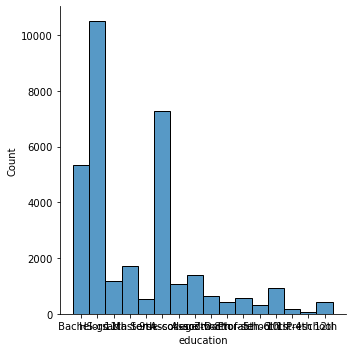

In [36]:
# Total number of individuals in each education class
sns.displot(df1_clean['education'], bins=16)

<AxesSubplot:xlabel='age', ylabel='education'>

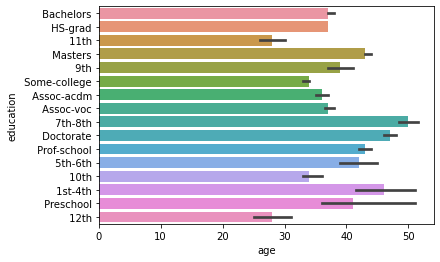

In [37]:

import numpy as np

# Median age of indiviudals in each education class

sns.barplot(x='age',y='education',data=df1_clean, estimator=np.median)


In [38]:
# Here, I am changing the variable 'salary' to a numerical factor

df['salary'] = pd.factorize(df['salary'])[0]
print("Salary, as a numerical category")
df

Salary, as a numerical category


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


<function matplotlib.pyplot.show(close=None, block=None)>

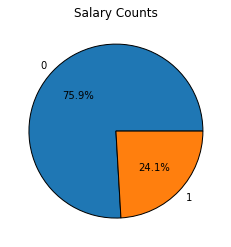

<Figure size 864x864 with 0 Axes>

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# from previous steps, salary has been factorized as a number instead of string.
# 0 represents individuals making less than 50 thousand dollars
# 1 represents individuals making greater than 50 thousand dollars

plt.pie(list(df['salary'].value_counts()), autopct='%1.1f%%', labels = [0,1], wedgeprops={'edgecolor':'black'})
plt.title('Salary Counts')
plt.figure(figsize=(12,12))
plt.show

<AxesSubplot:xlabel='salary', ylabel='education'>

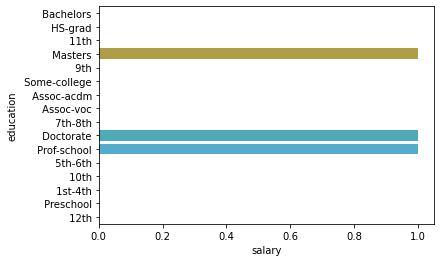

In [39]:
# Using salary as a numerical category, I am looking at which education classes have the highest salary
# As seen in the visualization, only masters, doctorate, and prof-school have a median salary above $50 thousand

sns.barplot(x='salary',y='education',data=df, estimator=np.median)


Text(0.5, 1.0, 'Hours per Week Worked for each Education Class')

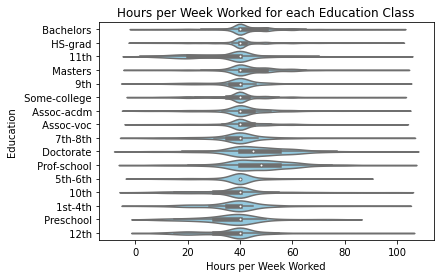

In [26]:
# This graph shows the average hours worked per week for each educational class. 
# It is assumed that as hours per week increases, so does salary, so this plot will help answer that assumption.
sns.violinplot(data=df, y='education', x ='hours-per-week', scale='width',
               figsize=(5, 8),
               color='skyblue')
plt.ylabel('Education')
plt.xlabel('Hours per Week Worked')
plt.title('Hours per Week Worked for each Education Class')

Text(0.5, 1.0, 'Salary earned in relation to Hours Worked')

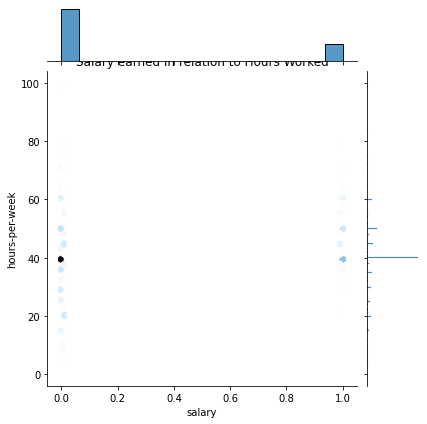

In [35]:
# This graph answers a previous asumption that salary increases when hours worked increases.
# The ticks on the salary greater than $50 thousand only increase at 40 hours per week
# With a salary of less than 50 thousand, the hours per work range from 15-60. This is expected.
sns.jointplot(data=df, x='salary', y='hours-per-week', kind='hex')

plt.title('Salary earned in relation to Hours Worked')

# Conclusion 

From the visualizations above, I am able to effectively answer my research question of: How do the attributes occupation, education, and hours per week worked, affect an individuals ability to earn greater than or less than $50 thousand dollars.

Completing more education after a bachelors degree such as masters or a doctorate degree can give the individual more opportunity to earn a higher salary.  However, in most cases this also comes with an increased workload and more hours worked per week. One limitation to this dataset is not being able to see the actual salary of an individual, only placing salary into two categories.  Because of this, I do not know the exact amount each person is making (it could be $50,001 or 1 million, and we would not know). This partially limits my conclusion as making just over 50 thousand may not be worth the extra education. 

I believe that educational levels play the biggest factor in determining the salary of an individual in this dataset.



In [ ]:
# Saving dataframe to import into Tableau
df4_clean.to_csv(f"../data/processed/Analysis 3.csv", index=False)